![title](img.jpg)

# AIR CRASH ANALYSIS
### Applied Data Science Capstone by IBM/Coursera

## 1.Introduction <a name="introduction"></a>

In our day to day life we encounter several accidents. Accidents may happen on road, water and air. However, Air accidents cause severe damages and brings more risks for whom travel by air. 

Statistically, air travel is safer than other source but when something goes wrong during air travel, it can be catastrophic with hundreds of lives at stake.

Since there are plenty of aircrafts, **Boeing and Airbus** are considered for this study. 
Boeing and Airbus are the most powerful commercial jets in the world. Even these aircraft manufacturers have different types of aircrafts with lots of safety measurements, Accidents are been reported every year. When there is a 0% reported air accidents over the certain period, it can be considered as 100% growth in aircraft technology.

From **1990 to 2020**, there were many major accidents happened due to many reasons. In this analysis, The Cause of the accident, damages, Airlines and other facts are been analyzed. From the analyzed data, Safest airlines and aircrafts can be found using data science.

Also with some attributes of Accidents, we can make decision about nature of accident.

## 2.Data

Collected data are from below sources.
* Accident data source - aviation-safety.net
* Aircraft Registrations - Wikipedia.com
 
Accident rates between Boeing and airbus aircrafts, accident rates between each types of aircraft, locations where accident happened, reasons for the accidents are analyzed in this study.

Below tools are been used for the analysis,

* geocoder to get loction address,latitude and longitude. 
* Folium to point the places in the map.
* Foursuare to find near airport.

**Plane crach data & Boeing accident data**

Plane crach data is taken from aviation-safety.net, which includes all passenger flight accidets of Airbus and Boeing. 

Another data set have all accidents about Boeing, mostly inside the USA.  

In [6]:
import types
import pandas as pd

df_air = pd.read_excel('plane_crash.csv.xlsx')

In [7]:
df_air.head(10)

date             type registration           operator  \
0  2015-10-31 00:00:00  Airbus A321-231       EI-ETJ           Metrojet   
1  2007-07-17 00:00:00  Airbus A320-233       PR-MBK         TAM Brasil   
2  2014-12-28 00:00:00  Airbus A320-216       PK-AXC  Indonesia AirAsia   
3  2010-07-28 00:00:00  Airbus A321-231       AP-BJB            Airblue   
4  2015-03-24 00:00:00  Airbus A320-211       D-AIPX        Germanwings   
5  2000-08-23 00:00:00  Airbus A320-212       A4O-EK           Gulf Air   
6  2006-05-03 00:00:00  Airbus A320-211      EK32009            Armavia   
7  1990-02-14 00:00:00  Airbus A320-231       VT-EPN    Indian Airlines   
8  1992-01-20 00:00:00  Airbus A320-111       F-GGED          Air Inter   
9  2016-05-19 00:00:00  Airbus A320-232       SU-GCC           EgyptAir   

    fat.            location cat  
0  224.0               Hasna  C1  
1  199.0           São Paulo  A1  
2  162.0     Karimata Strait  A1  
3  152.0     Islamabad-Be...  A1  
4  150.0  Prads-Haute-Bléone  C1  
5  143.0             البحرين  A1  
6  113.0     Adler/Sochi ...  A1  
7   92.0           Bangalore  A1  
8   87.0          Strasbourg  A1  
9   66.0      Egyptian coast  C1

In [8]:
df_boeing = pd.read_excel('Boeing.xlsx')

In [9]:
df_boeing.tail(10)

InvestigationType  EventDate        Location City       Country  \
797          Incident 1982-04-09      YOUNGSTOWN   OH  UnitedStates   
798          Accident 1982-03-24          MARANA   AZ  UnitedStates   
799          Accident 1982-03-13        GLENDALE   AZ  UnitedStates   
800          Incident 1982-03-08        LASVEGAS   NV  UnitedStates   
801          Incident 1982-02-19       HARLINGEN   TX  UnitedStates   
802          Accident 1982-02-17           MIAMI   FL  UnitedStates   
803          Incident 1982-02-15         ONTARIO   CA  UnitedStates   
804          Accident 1982-02-06         MEDFORD   OR  UnitedStates   
805          Accident 1982-01-13      WASHINGTON   DC  UnitedStates   
806          Accident 1982-01-06  NEARBAKERSFIEL   CA  UnitedStates   

    AirportCode            AirportName InjurySeverity AircraftDamage  \
797         YNG    YOUNGSTOWNMUNICIPAL       Incident          Minor   
798         MJC          MARANAAIRPARK      Non-Fatal    Substantial   
799         LUF                    NaN          Fatal      Destroyed   
800         LAS      MCCARRANINTERNATL       Incident            NaN   
801         HRL   HARLINGENIND.AIRPARK       Incident            NaN   
802         MIA     MIAMIINTERNATIONAL      Non-Fatal    Substantial   
803         ONT   ONTARIOINTERNATIONAL       Incident          Minor   
804         MFR  MEDFORD-JACKSONCOUNTY      Non-Fatal          Minor   
805         NaN     WASHINGTONNATIONAL          Fatal      Destroyed   
806         NaN                    NaN      Non-Fatal    Substantial   

    RegistrationNumber      Model  NumberofEngines     EngineType  \
797             N7627U    727-200              3.0       TurboFan   
798             N752TA   707-123B              4.0       TurboJet   
799              KC135    KC-135A              4.0       TurboJet   
800              N6728   707-131B              4.0       TurboFan   
801              XAMEJ  B-727-200              3.0       TurboJet   
802              N4734    727-235              3.0       TurboFan   
803             N73717   B737-2H4              2.0       TurboJet   
804             N56270      A75N1              1.0  Reciprocating   
805              N62AF    737-222              2.0       TurboFan   
806             N59737        A75              1.0  Reciprocating   

     TotalFatalInjuries  TotalSeriousInjuries  TotalMinorInjuries  \
797                   0                     0                 0.0   
798                   0                     0                 0.0   
799                   6                     0                 0.0   
800                   1                     0                 0.0   
801                   0                     0                 0.0   
802                   0                     1                 1.0   
803                   0                     0                 0.0   
804                   0                     0                 0.0   
805                   0                    78                 6.0   
806                   0                     1                 0.0   

     TotalUninjured WeatherCondition BroadPhaseofFlight  
797           108.0              IMC            LANDING  
798             7.0              VMC            LANDING  
799             0.0              UNK           APPROACH  
800             0.0              VMC           STANDING  
801            83.0              IMC            LANDING  
802            51.0              VMC            TAKEOFF  
803           119.0              IMC           APPROACH  
804             3.0              VMC               TAXI  
805             0.0              IMC            TAKEOFF  
806             1.0              IMC             CRUISE

Longitude and Latudude of Plane Crash data Locations.

In [13]:
df_long = pd.read_csv('Longitude.csv',names = ['Longitude'])

In [14]:
df_lat = pd.read_csv('Latitude.csv',names = ['Latitude'])

In [15]:
df_lat.drop(df_lat.tail(6).index,inplace=True)
df_long.drop(df_long.tail(5).index,inplace=True)


In [16]:
df_air =pd.concat([df_air,df_lat, df_long], axis=1, sort=False)
df_air.tail()

date          type registration          operator  fat.  \
1270  2019-02-13 00:00:00  Boeing 787-9       PH-BHA               KLM   0.0   
1271  2019-08-02 00:00:00  Boeing 787-8       C-GHPU        Air Canada   0.0   
1272  2019-08-12 00:00:00  Boeing 787-9       G-CKWB  Norwegian Air UK   0.0   
1273                  NaN           NaN          NaN               NaN   NaN   
1274                  NaN           NaN          NaN               NaN   NaN   

                                               location  cat     Latitude  \
1270                                          Amsterdam   A2   52.3727598   
1271  Vancouver, Metro Vancouver Regional District, ...   A2   49.2608724   
1272                                                NaN   A2   46.3144754   
1273                                                NaN  NaN   31.6311229   
1274                                                NaN  NaN  -23.5506507   

       Longitude  
1270    4.893604  
1271 -123.113953  
1272   11.048029  
1273   -8.006177  
1274  -46.633382

In [17]:
df_air.drop(df_air.tail(2).index,inplace=True)


In [18]:
df_air['date'] = df_air['date'].astype('datetime64[ns]')
df_air['Latitude'] = df_air['Latitude'].astype(float)
df_air['Longitude'] = df_air['Longitude'].astype(float)
df_air['type']=df_air['type'].astype(str)
df_air['location'] = df_air['location'].astype(str)


Get the Location , Latitude and Longitude using geopy.geocorders library.

In [28]:
loc=[]
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

for index,row in df_air.iterrows():
    for location in df_air['location']:
        loc.append(location)
loc

['Hasna',
 'São Paulo',
 'Karimata Strait',
 'Islamabad-Be...',
 'Prads-Haute-Bléone',
 'البحرين',
 'Adler/Sochi ...',
 'Bangalore',
 'Strasbourg',
 'Egyptian coast',
 'Canet-Plage',
 'Tegucigalpa',
 'Warszawa',
 'Amman-Queen ...',
 'Mogadishu ',
 'Istanbul',
 'Hiroshima',
 'Tripoli ',
 'Windhoek',
 'Berlin-Schön...',
 'Las Vegas-Mc...',
 'Düsseldorf ',
 'Halifax-Stan...',
 'Charlotte',
 'Glasgow ',
 'Leipzig ',
 'Tripoli ',
 'Manila',
 'Roma',
 'Davao City',
 'Varna ',
 'London',
 'Seoul',
 'Lyon Saint',
 'Melbourn',
 'Deauville',
 'Yangon',
 'Yangon',
 'München',
 'Philadelphia…',
 'Kulob',
 'Jaipur ',
 'London',
 'Roma,Italy',
 'Jakarta',
 'Larnaca',
 'Phoenix',
 'Istanbul',
 'Los Angeles ',
 'Macau ',
 'São Paulo',
 'Αθήνα, Δήμος Αθηναίων, Περιφερειακή Ενότητα Κεντρικού Τομέα Αθηνών, 10667, Ελλάδα',
 'Antalya ',
 'Billund ',
 'London',
 'Bristol',
 'Belfast',
 'New York',
 'Tripoli',
 'Amsterdam',
 'Frankfurt ',
 'San Francisco',
 'Orlando ',
 'Zhukovsky ',
 'Zhengzhou',
 'Murcia-S

## 3.Analysis and Visualization

In [31]:
df_air['location'].value_counts()


London        27
New York      15
Amsterdam     15
Denver        14
Istanbul      14
              ..
Pusan          1
Kailua, HI     1
Aden           1
Niamey         1
Parkes         1
Name: location, Length: 602, dtype: int64

* According to the data, Most of the Passenger Aircraft Accidents happend in **London** between 1990 to 2020.

In [97]:
df_air['fat.'].sum()

15539.0

In [25]:
lat =[]
lon = []
n=0
from geopy.exc import GeocoderTimedOut
for location in loc:
    n=n+1
    try:
        ad = geolocator.geocode(location)
        lat.append(ad.latitude)
        lon.append(ad.longitude)
        print(n,ad.address)
    except GeocoderTimedOut as e:
        
        try:
            ad = geolocator.geocode(location)
            lat.append(ad.latitude)
            lon.append(ad.longitude)
            print(n,ad.address)
        except GeocoderTimedOut as e:
        
            pass
    
    if (n==1280):
        break
    if (location == 'null'):
        ad = 'null'
        print(n,ad)

1 Hasna, Boulevard Mohammed V, El Hara, Guéliz ⴳⵉⵍⵉⵣ گليز, arrondissement de Guéliz كليز, Marrakech ⵎⵕⵕⴰⴽⵯⵛ مراكش, Pachalik de Marrakech, Préfecture de Marrakech عمالة مراكش, Marrakech-Safi ⵎⵕⵕⴰⴽⵛ-ⴰⵙⴼⵉ مراكش-أسفي, 40025, Maroc
2 São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
3 Selat Karimata, Kepulauan Bangka Belitung, Indonesia
4 চট্টগ্রাম, চট্টগ্রাম জেলা, চট্টগ্রাম বিভাগ, 4000, Bangladesh
5 Prads-Haute-Bléone, Digne-les-Bains, Alpes-de-Haute-Provence, Provence-Alpes-Côte d'Azur, France métropolitaine, 04420, France
6 البحرين
7 Адлер, Адлерский внутригородской район, Сочи, городской округ Сочи, Краснодарский край, Южный федеральный округ, 354348, Россия
8 Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
9 Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, France
10 Egyptian Theatre, South Broadway, Coos Bay, Coos County, Oregon, 97420, United States of America

137 دوما, ناحية دوما, منطقة دوما, محافظة ريف دمشق, Sūriyya سوريا
138 Verona, Veneto, Italia
139 Denver, Denver County, Colorado, United States of America
140 Paris, Île-de-France, France métropolitaine, France
141 Fort Lauderdale, Broward County, Florida, United States of America
142 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
143 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
144 Bruxelles / Brussel, Ville de Bruxelles - Stad Brussel, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België - Belgique - Belgien
145 New York, United States of America
146 Praha, okres Hlavní město Praha, Hlavní město Praha, Praha, Česká republika
147 London, Greater London, England, SW1A 2DX, United Kingdom
148 Butuan, Agusan del Norte, Caraga, 8600`, Philippines
149 Detroit, Wayne County, M

KeyboardInterrupt: 

Below map shows the places where Accidents Happend and every points includes the label of airline, loction,aircraft type and date

In [34]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

import folium # map rendering library

# create map of New York using latitude and longitude values
map_accident = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, airtype, location, date, airline in zip(df_air['Latitude'], df_air['Longitude'], df_air['type'], df_air['location'],df_air['date'],df_air['operator']):
    label = '{}, {},{},{}'.format(airtype, location,date, airline)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_accident)  
    
map_accident

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [35]:
df_air['cat'].value_counts()

A1    499
A2    489
H2    151
O1     48
C1     30
I2     28
C2     12
O2      9
H1      7
Name: cat, dtype: int64

Accident Categories
* A = Accident
* I = Incident
* H = Hijacking
* C = Criminal occurrence (sabotage, shoot down)
* O= other occurrence (ground fire, sabotage)
* 1 = hull-loss
* 2 = repairable damage

According to the below results, Most of the Accidents are hull-loss.Also 151 cases of Hijacking.

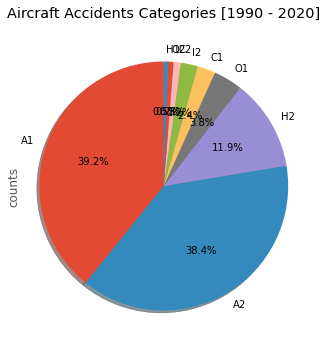

In [94]:
df_cat = df_air['cat'].value_counts().rename_axis('Categories').reset_index(name='counts')
df_cat = df_cat.set_index('Categories')

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
df_cat['counts'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Aircraft Accidents Categories [1990 - 2020]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [39]:
df_air['Year'] = df_air['date'].apply(lambda x: "%d" % (x.year))
df_year = df_air['Year'].value_counts().rename_axis('Year').reset_index(name='counts')
df_year.sort_values(by=['Year'], inplace=True)
df_year.reset_index(drop=True, inplace=True)
df_air['operator'].value_counts()

Southwest Airlines                                       42
American Airlines                                        30
Ryanair                                                  26
United Airlines                                          26
Ethiopian Airlines                                       24
                                                         ..
Million Air Charter, op.for Zimbabwe Express Airlines     1
TMA                                                       1
Ethiopian Airlines, op.for ASKY Airlines                  1
Kalitta Air, op.for Centurion Air Cargo                   1
Windjet                                                   1
Name: operator, Length: 453, dtype: int64

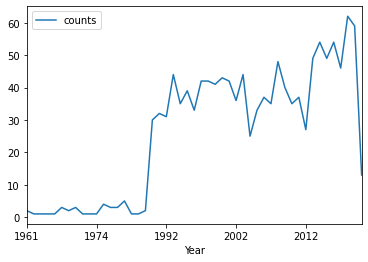

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df_year.plot(kind='line',x='Year',y='counts')

In Years vs Accident counts graph, it's clearly shown that every decades accidents are increasing. 

According to the Aviation Safety Network, “loss of control” was the primary cause of crashes in 2018—which includes pilot error, environmental factors like weather, and mechanical failure.

Accidents in 1990's: 369  2000's: 383  2010's: 472  2020's: 13


Text(0.5, 1.0, 'Accidents between decades')

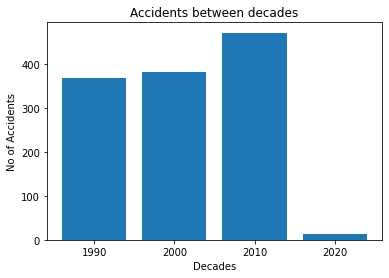

In [40]:

a1=0
b1=0
c1=0
d1=0

for data in df_air['date']:
    result = data.year
    result = str(result)
    if (result.startswith('201')):
            a1 = a1+1
    elif (result.startswith('200')):
            b1 = b1+1
    elif (result.startswith('199')):
            c1 = c1+1
    elif (result.startswith('202')):
            d1 = d1+1
year_rate = [c1,b1,a1,d1]
print("Accidents in 1990's:" ,c1 , " 2000's:" ,b1 ," 2010's:" , a1, " 2020's:", d1  )
years =['1990','2000','2010','2020']

pyplot.bar(years, year_rate)

# set x/y labels and plot title
plt.pyplot.xlabel("Decades")
plt.pyplot.ylabel("No of Accidents")
plt.pyplot.title("Accidents between decades")

In [41]:
df_aircraft = df_air['type'].value_counts().rename_axis('Aircraft').reset_index(name='counts')
df_aircraft = df_aircraft.set_index('Aircraft')
df_aircraft=df_aircraft.head(5)
df_aircraft

counts
Aircraft                   
Boeing 737-8AS (WL)      28
Airbus A320-214          23
Airbus A320-232          23
Airbus A321-231          19
Boeing 737               18

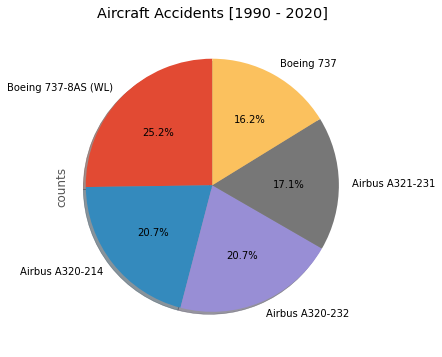

In [42]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
df_aircraft['counts'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Aircraft Accidents [1990 - 2020]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## 4.Model Development

**Below database According to the National Transportation Safety Board in Washington, DC**

Mainly focused on Boeing Aircrafts Accidents 

In [43]:
df_boeing =df_boeing.dropna()

In [44]:
df_boeing['NumberofEngines']=df_boeing['NumberofEngines'].astype(int)

In [47]:
AX = df_boeing['InvestigationType'].unique()
BX = df_boeing['EngineType'].unique()
CX = df_boeing['WeatherCondition'].unique()
DX = df_boeing['BroadPhaseofFlight'].unique()
AY = df_boeing['AircraftDamage'].unique()
print(AX,BX,CX,DX)

['Accident' 'Incident'] ['TurboFan' 'Reciprocating' 'TurboJet' 'TurboProp'] ['VMC' 'IMC' 'UNK'] ['LANDING' 'TAKEOFF' 'TAXI' 'CLIMB' 'CRUISE' 'APPROACH' 'STANDING'
 'DESCENT' 'GO-AROUND' 'MANEUVERING']


In [46]:
df_boeing.dtypes

InvestigationType               object
EventDate               datetime64[ns]
Location                        object
City                            object
Country                         object
AirportCode                     object
AirportName                     object
InjurySeverity                  object
AircraftDamage                  object
RegistrationNumber              object
Model                           object
NumberofEngines                  int32
EngineType                      object
TotalFatalInjuries               int64
TotalSeriousInjuries             int64
TotalMinorInjuries             float64
TotalUninjured                 float64
WeatherCondition                object
BroadPhaseofFlight              object
dtype: object

Independent Variables are
* Investigation Type - Accident or Incident
* Engine Type - TurboFan or Reciprocating or TurboJet or TurboProp
* Weather Condition - VMC(visual meteorological conditions) or IMC (Instrument meteorological conditions) or UNK(Unkown)
* Broad Phase of Flight -LANDING or TAKEOFF or TAXI or CLIMB or CRUISE or APPROACH or STANDING or DESCENT or GO-AROUND or MANEUVERING
* Number of Engines - 1 or 2 or 3 or 4

In [48]:
X = df_boeing[['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']].values
X[:5]

array([['Accident', 'TurboFan', 'VMC', 'LANDING', 4],
       ['Accident', 'Reciprocating', 'VMC', 'LANDING', 1],
       ['Incident', 'TurboFan', 'VMC', 'TAKEOFF', 3],
       ['Incident', 'TurboFan', 'VMC', 'TAXI', 2],
       ['Incident', 'TurboFan', 'IMC', 'TAKEOFF', 3]], dtype=object)

**Predict nature of accident by using above independent factors,**
* Minor
* Substantial
* Destroyed

In [65]:
Y = df_boeing[['AircraftDamage']].values
Y[:5]

array([['Minor'],
       ['Substantial'],
       ['Minor'],
       ['Minor'],
       ['Minor']], dtype=object)

In [50]:
from sklearn import preprocessing
Inv = preprocessing.LabelEncoder()
Inv.fit(AX)
X[:,0] =Inv.transform(X[:,0])
X[0:5]

array([[0, 'TurboFan', 'VMC', 'LANDING', 4],
       [0, 'Reciprocating', 'VMC', 'LANDING', 1],
       [1, 'TurboFan', 'VMC', 'TAKEOFF', 3],
       [1, 'TurboFan', 'VMC', 'TAXI', 2],
       [1, 'TurboFan', 'IMC', 'TAKEOFF', 3]], dtype=object)

In [51]:
ET = preprocessing.LabelEncoder()
ET.fit(BX)
X[:,1] =ET.transform(X[:,1])
X[0:5]

array([[0, 1, 'VMC', 'LANDING', 4],
       [0, 0, 'VMC', 'LANDING', 1],
       [1, 1, 'VMC', 'TAKEOFF', 3],
       [1, 1, 'VMC', 'TAXI', 2],
       [1, 1, 'IMC', 'TAKEOFF', 3]], dtype=object)

In [52]:
WC = preprocessing.LabelEncoder()
WC.fit(CX)
X[:,2] =WC.transform(X[:,2])
X[0:5]

array([[0, 1, 2, 'LANDING', 4],
       [0, 0, 2, 'LANDING', 1],
       [1, 1, 2, 'TAKEOFF', 3],
       [1, 1, 2, 'TAXI', 2],
       [1, 1, 0, 'TAKEOFF', 3]], dtype=object)

In [53]:
BPF =preprocessing.LabelEncoder()
BPF.fit(DX)
X[:,3] =BPF.transform(X[:,3])
X[0:5]

array([[0, 1, 2, 5, 4],
       [0, 0, 2, 5, 1],
       [1, 1, 2, 8, 3],
       [1, 1, 2, 9, 2],
       [1, 1, 0, 8, 3]], dtype=object)

80% of train sets and 20% of tests test

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 3)
print(x_train.shape, x_test.shape)

(299, 5) (75, 5)


In [88]:
AirTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
AirTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
AirTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
predTree = AirTree.predict(x_test)

In [91]:
print(predTree[:10])
print(y_test[0:10])

['Substantial' 'Minor' 'Minor' 'Minor' 'Minor' 'Minor' 'Substantial'
 'Substantial' 'Substantial' 'Substantial']
[['Substantial']
 ['Minor']
 ['Minor']
 ['Minor']
 ['Minor']
 ['Minor']
 ['Substantial']
 ['Substantial']
 ['Substantial']
 ['Substantial']]


In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9066666666666666


In [60]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np

C:\Users\VIMANIYA\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [63]:
dot_data = StringIO()
filename = "airtree.png"
featureNames = ['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']
targetNames =  df_boeing['AircraftDamage'].unique().tolist()
out=tree.export_graphviz(AirTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(400, 400))
plt.imshow(img,interpolation='nearest')

**Predict Severity of injury  by using above independent factors,**
* Incident
* Non-Fatal
* Fatal

In [67]:
Z = df_boeing['InjurySeverity']

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,Z,test_size = 0.2 , random_state = 3)
print(x_train.shape, x_test.shape)

(299, 5) (75, 5)


In [69]:
InjuryTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
InjuryTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
InjuryTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
pred_InjuryTree = InjuryTree.predict(x_test)

In [72]:
print(pred_InjuryTree[:5])
print(y_test[0:5])

['Non-Fatal' 'Incident' 'Incident' 'Incident' 'Incident']
307       Fatal
708    Incident
730    Incident
128    Incident
694    Incident
Name: InjurySeverity, dtype: object


In [73]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_InjuryTree))

DecisionTrees's Accuracy:  0.9466666666666667


In [75]:
dot_data = StringIO()
filename = "InjuryTree.png"
featureNames = ['InvestigationType','EngineType','WeatherCondition','BroadPhaseofFlight','NumberofEngines']
targetNames =  df_boeing['InjurySeverity'].unique().tolist()
out=tree.export_graphviz(InjuryTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(400, 400))
plt.imshow(img,interpolation='nearest')

## Foursquare

In [76]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DBFMWGGQWRQFS2YJSMDER5LOCF52D4SLDCRD0ACGJRPY5QFE
CLIENT_SECRET:YDON4UTZKTVPJZEWDSJZLIUQWJEY2ZNOF01YT1P44IQMIT1Y


In [77]:
df_boeing['Location'].value_counts()

MIAMI         19
CHICAGO       17
LOSANGELES    13
DENVER        13
ANCHORAGE     11
              ..
WONDERLAKE     1
GREENSBORO     1
KINSTON        1
BELVIDERE      1
CORONA         1
Name: Location, Length: 208, dtype: int64

In [78]:
df_boeing['BroadPhaseofFlight'].value_counts()

LANDING        118
TAKEOFF         85
TAXI            56
APPROACH        49
STANDING        17
MANEUVERING     12
CRUISE          10
DESCENT          9
GO-AROUND        9
CLIMB            9
Name: BroadPhaseofFlight, dtype: int64

Most of the accidents happend in Miami while Landing, so sorrounded area is in danger zone.

In [79]:
address = 'MIAMI Airport'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of MIAMI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of MIAMI are 25.7834634, -80.1775503.


In [80]:
LIMIT =100
radius = 300

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [81]:
import requests
results = requests.get(url).json()

In [82]:
results

{'meta': {'code': 200, 'requestId': '5ebba3c998205d001c4406df'},
 'response': {'headerLocation': 'Downtown Miami',
  'headerFullLocation': 'Downtown Miami, Miami',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 25.7861634027, 'lng': -80.17455737602023},
   'sw': {'lat': 25.780763397299996, 'lng': -80.18054322397975}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '570accd9498e4f01ddd49c33',
       'name': 'The Deck at Island Gardens',
       'location': {'address': '882 McArthur Causway',
        'lat': 25.784907269130784,
        'lng': -80.17811332936976,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.784907269130784,
          'lng': -80.17811332936976}],
        'distance': 170,
        'c

In [83]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [96]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat        lng
0        The Deck at Island Gardens  Seafood Restaurant  25.784907 -80.178113
1           Miami Children's Museum              Museum  25.783800 -80.176474
2  Subway @ Miami Children's Museum      Sandwich Place  25.784718 -80.176438
3           Miami Children's Museum              Museum  25.784803 -80.176460
4              Island Gardens Miami       Boat or Ferry  25.784545 -80.178769

In [85]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [86]:
import folium # map rendering library

# create map of New York using latitude and longitude values
map_accident = folium.Map(location=[latitude, longitude], zoom_start=18)

# add markers to map
for lat, lng, name,  categories in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_accident)  
    
map_accident

## 6.Results and Discussion 

In this analysis two databases were used to develop the model and get overall idea about Air crash accidents.Analysis and Visualization part focused on basic idea on what happend in past.From bar graph, every decades Air accidents are inreasing, while technology development. Basic reason for increasing in Accident rate everyecade is increase in air transport useres.
According to our analysis most of the accidents happens in Europe and America, also those countries have busiest airpots.More than 20% of Acidents are happening while landing. 

from the data we can see some factors give huge impact on these accidents, those are Investigation Type,Engine Type,Weather Condition,Broad Phase of Flight and Number of Engines. from these data we can predict if accident or incident happens , will it minor or major accident.

To implement the model, Decision Tree method was used.
Also Foursquare method was used to get surronded area of accident.

## 7.Conclusion

Purpose of this project is analysis the Air accidents and it's factors. Here Decision Tree method was used and accuracy of the model is more than 90%. Here two models were made to prdict Aircraft Damage and Injury Severity, respectively both have 90.66% and 94.66% accuracy.So model is good for predictions.


Most of the Accidents gives fatal damage to the Aircraft than Incident. number of Engines and Engine type also plays major roles in accidents.If no of engine is 4, then most of the accidents are unrecoverable.

Weather condition also another key factor. if weather is under IMC, then damage will be huge. so we have to consider weather more. other than that most of the accidents were happened while landing. it's better if practise the landing more and give feedback on landings for each pilots.